# Comparison of January 1 and January 8 data

In [1]:
import csv, datetime, pandas as pd

Reading January 1 data

In [2]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-01-mhn.csv'

parse_dates = ['timestamp']
jan_1_data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(jan_1_data['timestamp'])
print(jan_1_data.shape)

(3453, 12)


Reading January 8 data

In [3]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-08-mhn.csv'

parse_dates = ['timestamp']
jan_8_data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(jan_8_data['timestamp'])
print(jan_8_data.shape)

(2313, 12)


Unique IP's in January 1

In [4]:
unique_src_jan_1 = jan_1_data.src.unique()
print(len(unique_src_jan_1))

996


Unique IP's in January 8

In [5]:
unique_src_jan_8 = jan_8_data.src.unique()
print(len(unique_src_jan_8))

922


Data Frame of January 1st and 8th data having a common IP address

In [6]:
common = pd.merge(jan_1_data, jan_8_data, how='inner', on=['src'])

Number and address of unique IP addresses in the common data frame

In [7]:
print(common.src.unique())
print(len(common.src.unique()))

['5.188.10.103' '77.72.82.80' '185.107.94.10' '181.214.87.12'
 '77.72.82.158' '58.218.205.102' '85.93.20.34' '185.107.94.69'
 '216.158.238.186' '139.162.115.7' '5.188.10.108' '189.59.8.121'
 '146.0.77.21' '77.72.82.147' '51.15.152.29' '77.72.82.97' '109.248.9.248'
 '181.214.87.11' '95.215.1.37' '191.101.167.77' '141.105.69.190'
 '139.162.123.103' '5.188.86.140' '216.158.238.210' '5.188.10.144'
 '184.105.139.69' '181.214.87.50' '185.130.212.167' '80.82.77.33'
 '106.186.113.169' '191.101.167.235' '109.248.9.114' '5.188.203.129'
 '191.101.167.83' '216.158.239.226' '202.113.109.8' '164.132.136.165'
 '46.174.191.29' '5.188.86.12' '49.5.3.238' '216.158.238.178'
 '5.188.86.41' '77.72.85.101' '134.119.218.49' '185.222.211.21'
 '91.210.104.245' '191.101.167.250' '5.101.0.9' '191.101.167.251'
 '80.82.77.139' '221.207.32.250' '191.101.167.215' '181.214.87.239'
 '220.197.207.238' '191.101.167.253' '139.162.113.212' '5.101.40.10'
 '185.107.94.58' '141.212.122.128' '77.72.82.182' '91.210.104.217'
 '

In [8]:
print(common.shape)
common_time_series = common[common.timestamp_x.dt.hour == common.timestamp_y.dt.hour]
print(common_time_series.shape)
print(len(common_time_series.src.unique()))

(104790, 23)
(4679, 23)
41


In [9]:
common_hour_time_series = common_time_series.groupby(common_time_series.timestamp_x.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp_x':'Hour'})
print(common_hour_time_series)

    Hour  Count
0      0    345
1      1    279
2      2    252
3      3    302
4      4    281
5      5    293
6      6    229
7      7     53
8      8     27
9      9     27
10    10     30
11    11     27
12    12     32
13    13     18
14    14    161
15    15    215
16    16    207
17    17    208
18    18    205
19    19    222
20    20    288
21    21    330
22    22    334
23    23    314


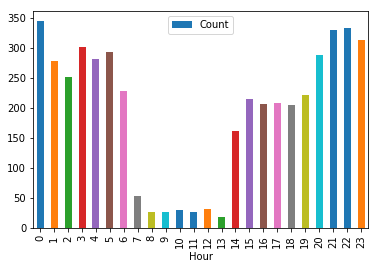

In [11]:
common_hour_time_series.plot(kind ='bar', x = 'Hour', y = 'Count')